In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [2]:
data_folder = "../../../data/"

figures_folder = "../../Figures/SHH/"

sif_output = "../../sif_files/SHH/"

Selecting as resources just Signor

In [3]:
resources = Resources()

In [4]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

In [5]:
df = resources.interactions

In [6]:
# Remove rows where 'source' or 'target' starts with "CHEBI"
filtered_df = df[~(df['source'].str.startswith('CHEBI') | df['target'].str.startswith('CHEBI'))]

Loading the data from Antoine

In [20]:
data = pd.read_csv(data_folder + "Northcott_Lin_genes.csv")

Selecting just SHH group

In [26]:
shh_list = data["SHH"].dropna()

In [28]:
shh_list = shh_list.to_list()

In [29]:
shh_list

['PTCH1',
 'SUFU',
 'SMO',
 'KMT2D',
 'KMT2C',
 'CREBBP',
 'GSE1',
 'BCOR',
 'GLI2',
 'TCF4',
 'TERT',
 'TP53',
 'BRCA2',
 'PTEN',
 'PRKAR1A',
 'EPHA7',
 'FBXW7',
 'DDX3X',
 'IDH1',
 'ATOH1',
 'BBX',
 'CEBPA',
 'DMRTA1',
 'NFATC1',
 'PBX1',
 'POU3F3',
 'POU6F2',
 'RARB',
 'SOX13',
 'SOX2',
 'TBX18']

# Creating a Network starting from All Omnipath interactions

In [30]:
shh_net = Network(shh_list, resources = filtered_df)

Error: node GSE1 is not present in the resources database
Error: node BBX is not present in the resources database
Error: node DMRTA1 is not present in the resources database
Error: node POU6F2 is not present in the resources database


Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [31]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,PTCH1,Q13635,NaN
1,SUFU,Q9UMX1,NaN
2,SMO,Q99835,NaN
3,KMT2D,O14686,NaN
4,KMT2C,Q8NEZ4,NaN
5,CREBBP,Q92793,NaN
6,BCOR,Q6W2J9,NaN
7,GLI2,P10070,NaN
8,TCF4,P15884,NaN
9,TERT,O14746,NaN


In [32]:
shh_net.complete_connection(maxlen=3, algorithm='dfs', only_signed=True, connect_with_bias=False, consensus=False)

In [33]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,PTCH1,Q13635,NaN
1,SUFU,Q9UMX1,NaN
2,SMO,Q99835,NaN
3,KMT2D,O14686,NaN
4,KMT2C,Q8NEZ4,NaN
...,...,...,...
90,PBXIP1,Q96AQ6,NaN
91,SIGNOR-C73,SIGNOR-C73,NaN
92,SALL4,Q9UJQ4,NaN
93,SIGNOR-PF24,SIGNOR-PF24,NaN


In [34]:
shh_net.edges

,source,target,Type,Effect,References
0,Q9UMX1,P10070,None,bimodal,16316410; 20463034; 16316410; 20463034
1,P10070,Q13635,None,stimulation,16571352; 16571352
2,Q9UMX1,P08151,None,inhibition,15367681; 15367681
3,P08151,Q13635,None,stimulation,16571352; 19860666; 16571352; 19860666
4,Q9UMX1,P10071,None,inhibition,10564661; 10433919; 20463034; 10564661; 104339...
...,...,...,...,...,...
300,SIGNOR-PF24,P24941,None,stimulation,18354084
301,SIGNOR-C16,Q01860,None,stimulation,31306665
302,SIGNOR-C73,Q01860,None,stimulation,31583686
303,Q01860,SIGNOR-C73,None,form complex,7590241


In [35]:
df_gs = shh_net.convert_edgelist_into_genesymbol()

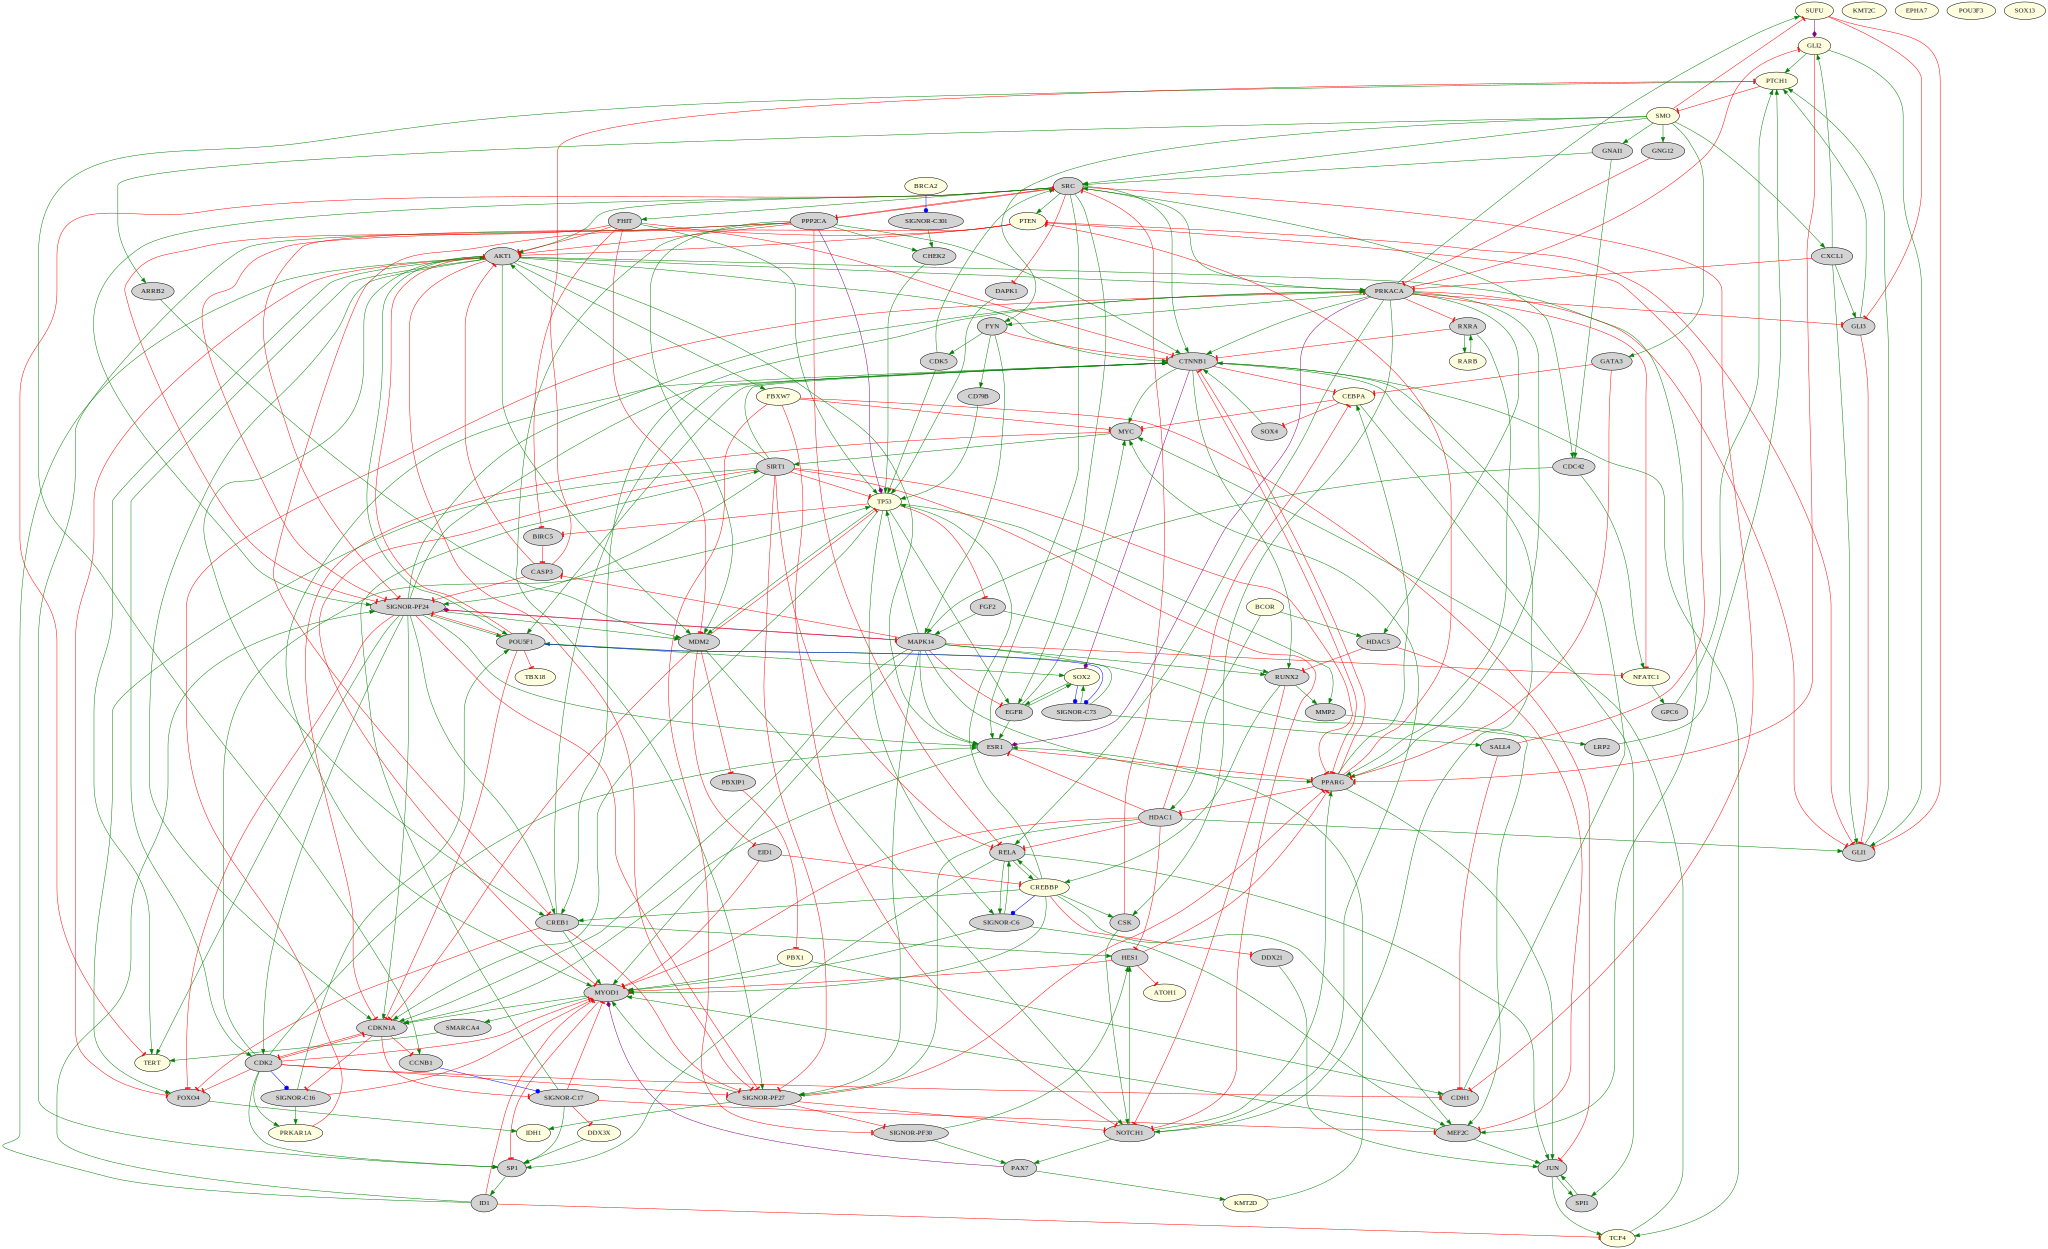

In [36]:
shh_visualizer = NetworkVisualizer(shh_net,color_by='effect', noi=True)
output = figures_folder + "SHH_signor_northcott"
shh_visualizer.render(output_file=output)

# Exporting Network in sif file

In [37]:
from neko._outputs.exports import Exports

In [38]:
for node in shh_net.nodes["Uniprot"]:
    if node not in shh_net.edges["source"].values and node not in shh_net.edges["target"].values:
        node = shh_net.nodes[ shh_net.nodes["Uniprot"] == node]["Genesymbol"].values
        print( node)
        shh_net.remove_node(node[0])

['KMT2C']
['EPHA7']
['POU3F3']
['SOX13']


In [39]:
export = Exports(shh_net)

In [40]:
export.export_sif(sif_output + "SHH_signor_northcott.sif")